In [6]:
import random
import numpy as np
from numpy.linalg import norm as vector_norm
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../modules')
from nsw import Node, NSWGraph

In [7]:
G = NSWGraph()

N = 400
values = []
for i in range(N):
    p = np.array([random.random(), random.random()])
    cls = 1 if vector_norm(p) > 0.8 else 0
    values.append((p, cls))

        
G.build_navigable_graph(values, K=7, multi_n=3)

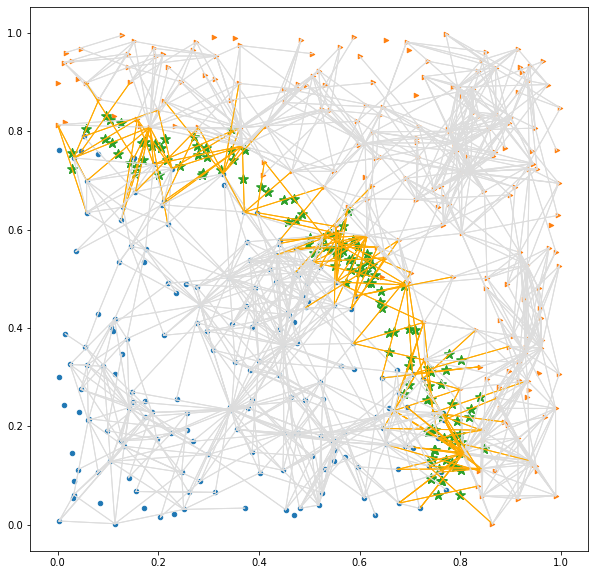

In [8]:
G.plot()

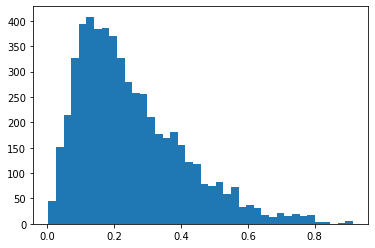

In [9]:
edges = [G.dist(G.nodes[e[0]].value, G.nodes[e[1]].value) for e in G.get_edges()]

plt.hist(edges, bins=40)
plt.show()

In [11]:
# https://stackoverflow.com/questions/36795949/python-testing-if-my-data-follows-a-lognormal-distribution
from  scipy.stats import lognorm, poisson, kstest
shape, loc, scale = lognorm.fit(edges)
print("Params", shape, loc, scale)
print("Params log(scale), shape =", np.log(scale), shape)
expected_value = shape * scale
print("E =", expected_value) # edge length

Params 0.5056412542942272 -0.060283256643493405 0.2751534606874675
Params log(scale), shape = -1.2904262980978327 0.5056412542942272
E = 0.1391289409854084


In [12]:
# https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.kstest.html
kstest(edges, "lognorm", lognorm.fit(edges))
# both numbers are rather small. Highly likely to have lognorm

KstestResult(statistic=0.025216799575679794, pvalue=0.0017468571500517459)